<center style="font-size:35px;color:red;font-weight:bold"> Initiation à Python</center><br>
<center style="color:black;font-size:20px"> Complément de cours  </center>
<center style="color:black;font-size:14px"> Python & SciPy : réaliser des graphes </center>
<br>
<center style="color:black">**Cours du Pr. Abdellah AZMANI**</center>
<center style="color:black">**Département Génie Informatique**</center>
<br>
<center style="color:black">Université Abdelmalek Essaadi</center>
<center style="color:black">Faculté des Sciences et Techniques</center>
<center style="color:black">Tanger</center>

La librairie SciPy qui permet le calcul scientifique est composée de plusieurs sous-modules permettant différentes opérations comme les opérations d’optimisation, d’algèbre linéaire, d’interpolation, etc.

Nous prêterons attention en particulier au sous-module **CSGraph** qui est l’acronyme de Compressed Sparse Graph et qui comprend des opérations permettant de travailler avec des graphes et dont les algorithmes se basent sur des représentations matricielles éparses.

La création de ce sous-module a été motivée par plusieurs algorithmes utilisés dans scikit-learn.

## Définitions

Tout d’abord un graphe est un couple **G = (V, E)**, où V est l’ensemble des sommets appelés également nœuds ou points et E est l’ensemble des arêtes appelées aussi liens ou lignes et qui sont des paires de sommets, i.e. une arête est liée à deux sommets distincts.

Un graphe creux (sparse graph) quant à lui est un graphe contenant peu d’arêtes.

## Représentations de graphe en utilisant Scipy

Le sous-module **CSGraph** utilise les graphes représentés dans des matrices éparses.

Un graphe de N nœuds peut être représenté par une matrice de N lignes et N colonnes.

Si i et j sont deux nœuds du graphe alors G [i, j] = w, avec w le poids de l’arête qui lie entre ces deux nœuds.
Si i et j deux nœuds du graphe et qui ne sont pas liés, alors leur valeur dans la matrice dépend de la représentation :
- Pour les représentations de matrices denses G [i, j] = 0, l’infini ou NaN.

- Pour les représentations denses masquées (i.e. np.ma.MaskedArray) G [i, j] = valeur masquée.

- Pour les représentations de matrices éparses G [i, j] = non-entrée.

### Exemple 1 :

Le graphe ci-dessous contient 3 nœuds.

Où : G [2,3] = 1 et G [2,4] = 2

<img src="graphes/image001.jpg"/>

Afin de représenter ce graphe on peut procéder selon les trois représentations précédemment citées, on obtient alors :

In [5]:
import numpy as np
from scipy.sparse import csr_matrix
#représentation du graphe dense
G_dense = np.array([[0, 1, 2],
[1, 0, 0],
[2, 0, 0]])
print(G_dense)
print("-------------------")
#représentation du graphe masque
G_masque = np.ma.masked_values(G_dense, 0)
print(G_masque)
print("-------------------")
#représentation du graphe éparse
G_eparse = csr_matrix(G_dense)
print(G_eparse)

[[0 1 2]
 [1 0 0]
 [2 0 0]]
-------------------
[[-- 1 2]
 [1 -- --]
 [2 -- --]]
-------------------
  (0, 1)	1
  (0, 2)	2
  (1, 0)	1
  (2, 0)	2


Le code précédent engendrera des erreurs si on a dans le graphe un poids nul. Alors pour remédier à cela on peut faire appel à la routine utilitaire **csgraph_from_dense** du sous-module **CSGraph** qui permet de convertir une représentation dense en une représentation éparse pouvant être comprise par les algorithmes du sous-module.

### Exemple 2 :

Le graphe ci-dessous contient 3 nœuds.

Où : G [2,3] = 1 et G [2,4] = 0

<img src="graphes/image003.png"/>

In [7]:
from scipy.sparse.csgraph import csgraph_from_dense
#représentation du graphe dense
G_dense = np.array([[np.inf, 1, 0],
[1, np.inf, np.inf],
[0, np.inf, np.inf]])
print(G_dense)
print("-------------------")
#représentation du graphe masqué
G_masque = np.ma.masked_invalid(G_dense)
print(G_masque)
print("-------------------")
#représentation du graphe éparse
G_sparse = csgraph_from_dense(G_dense, null_value=np.inf)
print(G_sparse)

[[inf  1.  0.]
 [ 1. inf inf]
 [ 0. inf inf]]
-------------------
[[-- 1.0 0.0]
 [1.0 -- --]
 [0.0 -- --]]
-------------------
  (0, 1)	1.0
  (0, 2)	0.0
  (1, 0)	1.0
  (2, 0)	0.0


Le tableau ci-dessous regroupe quelques routines utilitaires du sous-module CSGraph.

| FONCTION | DESCRIPTION |
| :--------- | :----------------------- |
| csgraph_from_dense | Construit un graphe de format CSR (Compressed Sparse Row) à partir d’une matrice dense. |
| csgraph_from_masked | Construit un graphe de format CSR (Compressed Sparse Row) à partir d’une matrice masquée. |
| csgraph_masked_from_dense | Construit une représentation du graphe en une matrice masqué à partir d’une matrice dense. |
| csgraph_to_dense | Converti une représentation éparse en une représentation dense. |
| csgraph_to_masked | Converti une représentation éparse en une représentation masquée. |


## Algorithmes de la théorie des graphes

### Algorithmes de parcours d’un graphe

#### Algorithme de parcours en largeur (BFS : Breadth First Search)

La fonction **breadth_first_tree** permet de parcourir un graphe selon l’algorithme de parcours en largeur.

#### Exemple 3 :

Appliquons l’algorithme de parcours en largeur sur le graphe suivant :
<img src="graphes/image005.jpg"/>

In [12]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import breadth_first_tree 
G = [[0, 1, 2, 0, 0],
[0, 0, 0, 2, 2],
[0, 3, 0, 2, 0],
[0, 0, 0, 0, 4],
[0, 0, 0, 0, 0]]
G_eparse = csr_matrix(G)
p = breadth_first_tree ( G_eparse, 0, directed = True)
p.toarray().astype(int)

array([[0, 1, 2, 0, 0],
       [0, 0, 0, 2, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

#### Algorithme de parcours en profondeur (DFS : Depth First Search)

La fonction **depth_first_tree** permet de parcourir un graphe selon l’algorithme de parcours en profondeur.

In [13]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree 
G = [[0, 1, 2, 0, 0],
[0, 0, 0, 2, 2],
[0, 3, 0, 2, 0],
[0, 0, 0, 0, 4],
[0, 0, 0, 0, 0]]
G_eparse = csr_matrix(G)
d = depth_first_tree ( G_eparse, 0, directed = True)
d.toarray().astype(int)

array([[0, 1, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

### Algorithmes du plus court chemin

#### Algorithme de Dijkstra

On peut faire appel à la fonction dijkstra du sous-module **CSGraph** pour appliquer l’algorithme de Dijkstra qui sert à résoudre le problème du plus court chemin dans un graphe orienté pondéré par des réels positifs.

La fonction dijkstra retourne :

- dist_matrix qui est la matrice des distances entre les nœuds du graphe.

- predecessors qui est la matrice des prédécesseurs.

<img src="graphes/image005-1.jpg"/>

In [17]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
G = [[0, 1, 2, 0, 0],
[0, 0, 0, 2, 2],
[0, 3, 0, 2, 0],
[0, 0, 0, 0, 4],
[0, 0, 0, 0, 0]]
G_eparse = csr_matrix(G)
dist_matrix, predecessors = dijkstra (csgraph = G_eparse, directed = True,
return_predecessors = True)
print(dist_matrix)
print("--------------------------")
print(predecessors)

[[ 0.  1.  2.  3.  3.]
 [inf  0. inf  2.  2.]
 [inf  3.  0.  2.  5.]
 [inf inf inf  0.  4.]
 [inf inf inf inf  0.]]
--------------------------
[[-9999     0     0     1     1]
 [-9999 -9999 -9999     1     1]
 [-9999     2 -9999     2     1]
 [-9999 -9999 -9999 -9999     3]
 [-9999 -9999 -9999 -9999 -9999]]


<span style="color:red">**Remarque :**</span>

<span style="color:red">Dans la matrice des prédécesseurs on retrouve dans certains cas **[i, j] = -9999**, par défaut ce nombre est affiché lorsqu’il n’existe pas de lien entre un nœud i et un nœud j. Dans le cas contraire elle nous donner l’indice du nœud précédent dans le chemin du point i au point j.</span>

### Algorithme de Floyd – Warshall

La fonction **floyd_warshall** permet de calculer les distances des plus courts chemins entre toutes les paires de sommets dans un graphe orienté et pondéré selon l’algorithme **Floyd - Warshall.**

La fonction **floyd_warshall** retourne :

- dist_matrix qui est la matrice des distances entre les nœuds du graphe.

- predecessors qui est la matrice des prédécesseurs.

#### Exemple 6 :

On reprend le graphe de l’exemple précédent et on applique dessus l’algorithme de **Floyd - Warshall.**

In [16]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall 
G = [[0, 1, 2, 0, 0],
[0, 0, 0, 2, 2],
[0, 3, 0, 2, 0],
[0, 0, 0, 0, 4],
[0, 0, 0, 0, 0]]
G_eparse = csr_matrix(G)
dist_matrix, predecessors = floyd_warshall ( csgraph = G_eparse, directed = True,
return_predecessors = True )
print(dist_matrix)
print("--------------------------")
print(predecessors)

[[ 0.  1.  2.  3.  3.]
 [inf  0. inf  2.  2.]
 [inf  3.  0.  2.  5.]
 [inf inf inf  0.  4.]
 [inf inf inf inf  0.]]
--------------------------
[[-9999     0     0     1     1]
 [-9999 -9999 -9999     1     1]
 [-9999     2 -9999     2     1]
 [-9999 -9999 -9999 -9999     3]
 [-9999 -9999 -9999 -9999 -9999]]


### Algorithme de Bellman - Ford

La fonction **bellman_ford** permet de calculer les plus courts chemins depuis un sommet source donné dans un graphe orienté et pondéré selon l’algorithme **Bellman - Ford**. Et contrairement à l’algorithme de Dijkstra, celui-ci autorise les poids négatifs.

La fonction **bellman_ford** retourne :

- dist_matrix qui est la matrice des distances entre les nœuds du graphe.

- predecessors qui est la matrice des prédécesseurs.

#### Exemple 7 :

Considérons le graphe suivant dans lequel on va appliquer l’algorithme de **Bellman - Ford** :

<img src="graphes/image010.jpg"/>

In [18]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import bellman_ford
G = [ [0, -1, 2, 0, 0],
[0, 0, 0, 2, 2],
[0, 3, 0, -2, 0],
[0, 0, 0, 0, -4],
[0, 0, 0, 0, 0] ]
G_eparse = csr_matrix(G)
dist_matrix, predecessors = bellman_ford (csgraph = G_eparse, directed = True,
return_predecessors = True)
print(dist_matrix)
print("--------------------------")
print(predecessors)

[[ 0. -1.  2.  0. -4.]
 [inf  0. inf  2. -2.]
 [inf  3.  0. -2. -6.]
 [inf inf inf  0. -4.]
 [inf inf inf inf  0.]]
--------------------------
[[-9999     0     0     2     3]
 [-9999 -9999 -9999     1     3]
 [-9999     2 -9999     2     3]
 [-9999 -9999 -9999 -9999     3]
 [-9999 -9999 -9999 -9999 -9999]]


## Représentations de graphe en utilisant Matplotlib
### networkx

Le module **networkx** permet de représenter un réseau ou un graphe de petite taille (< 500 noeuds). Un graphe est défini par un ensemble de noeuds (ou vertex en anglais) reliés par des arcs (ou edge en anglais). La galerie vous donnera une idée de ce que le module est capable de faire.

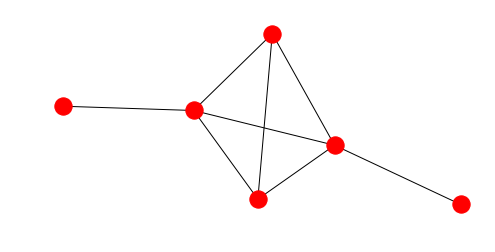

In [23]:
import random
import networkx as nx
G=nx.Graph()
for i in range(15) :
    G.add_edge ( random.randint(0,5),  random.randint(0,5) )

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,4))
nx.draw(G, ax = ax)

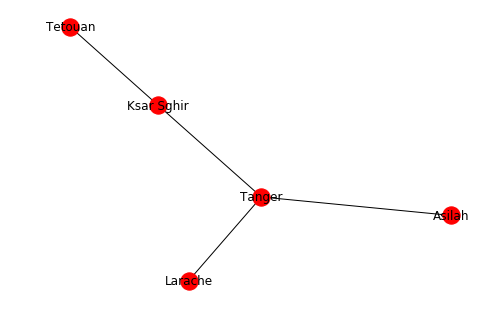

In [43]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['Tanger', 'Larache', 'Ksar Sghir','Tanger'], 'to':['Asilah', 'Tanger', 'Tetouan','Ksar Sghir']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

### Graphviz

**Graphviz** est un outil développé depuis plusieurs années déjà qui permet de réprésenter des graphes plus conséquents (> 500 noeuds). Il propose un choix plus riche de graphes.

Il est utilisable via le module **graphviz**. Son installation requiert l’installation de l’outil Graphviz qui n’est pas inclus. La différence entre les deux modules tient dans l’algorithme utilisé pour assigner des coordonnées à chaque noeud du graphe de façon à ce que ses arcs se croisent le moins possibles. Au delà d’une certaine taille, le dessin de graphe n’est plus lisible et nécessite quelques tatônnements. 

Cela peut passer par une clusterisation du graphe (voir la méthode Louvain) de façon à colorer certains noeuds proches voire à les regrouper.

In [29]:
import random, os
from graphviz import Digraph
from IPython.display import Image
from pyquickhelper.helpgen import find_graphviz_dot
bin = os.path.dirname(find_graphviz_dot())
if bin not in os.environ["PATH"]:
    os.environ["PATH"] = os.environ["PATH"] + ";" + bin

dot = Digraph(comment='random graph', format="png")
for i in range(15) :
    dot.edge ( str(random.randint(0,5)),  str(random.randint(0,5)) )

img = dot.render('t_random_graph.gv')
Image(img)

ModuleNotFoundError: No module named 'pyquickhelper'

In [32]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
dot  
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}
